## Decision Tree model 

In [1]:
#importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the dataset

data_dt = pd.read_csv('Encoded_clean_data.csv')
data_dt.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,day_of_week,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_timebin_evening,pickup_timebin_late night,pickup_timebin_midday,pickup_timebin_morning,vendor_id_1,vendor_id_2,weekday_weekday,weekday_weekend
0,1,-73.953918,40.778873,-73.963875,40.771164,400,2,29,1.199074,1,0,0,0,1,0,0,1,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,1100,3,11,4.129117,1,0,0,1,0,0,1,0,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,1635,2,21,7.250763,1,0,1,0,0,0,0,1,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,5,2.361101,1,0,0,0,0,1,0,1,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,848,2,17,4.328540,1,0,0,0,0,1,1,0,1,0


In [3]:
# Seperating the dependent and independent variables

x = data_dt.drop(['trip_duration'], axis=1)
y = data_dt['trip_duration']
x.shape, y.shape

((725161, 18), (725161,))

### Decision tree prerequisites

* Scaling and preprocessing of data is generally not required for decision tree, but since we have converted to bins, we'll leave the encoding for those. We wont be scaling the dataset and use as is

In [8]:
# splitting the data into train and test 

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

train_x.shape, test_x.shape

((543870, 18), (181291, 18))

### We will try to fit model with different max_depth values 

* Max depth value can lead to overfitting when it is high, and underfitting when it is low. It will be demonstrated for values of (18, 5) 
* We will then use GridSearchCV to tune the parameter to get best result

In [28]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

Train_error = []
Test_error = []

def fit_dectree(max_d):
    
    dec_t = DecisionTreeRegressor(criterion="mse", max_depth=max_d)
    
    dec_t.fit(train_x, train_y)
    
    dt_pred = dec_t.predict(test_x)
    
    Train_error.append(dec_t.score(train_x, train_y))
    Test_error.append(dec_t.score(test_x, test_y))
    

In [29]:
# To iterate for max depth values of 40 and 5

for i in [18,5]:
    
    fit_dectree(i)
    
    print ("\t\tFor {} \n".format(i))
    
    print ("Training Score = {} ".format(Train_error[[18,5].index(i)]))

    print ("Test Score = {} ".format(Test_error[[18,5].index(i)]))

    print ("RMSE = {} \n".format(np.sqrt(mse(dt_pred, test_y))))
    

		For 18 

Training Score = 0.8564763323096918 
Test Score = 0.5563400750161203 
RMSE = 461.9857529700828 

		For 5 

Training Score = 0.6251204408210391 
Test Score = 0.6300417491324666 
RMSE = 461.9857529700828 



* As we see that for max depth value of 18, the model tends to slightly overfit (evident from the score of train and test) and for value for 5, it tends to underfit a bit. It can also be seen in the graph

#### Now we will iterate from 1 to 20 in for loop

In [47]:
# First we will re initiate the lists to use for visualization

Train_error = []
Test_error = []

# iterate through 1 to 20 for max depth values

for i in range(1,21):
    
    # call the fic_dectree method
    fit_dectree(i)
    

#### Now to visualize to see where overfitting / underfitting occurs

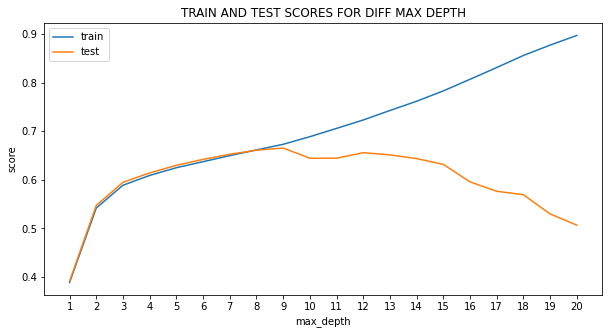

In [55]:
# plotting train score and test score

plt.figure(figsize=(10,5))
x = list(range(1,21))
plt.plot(x,Train_error)
plt.plot(x,Test_error)
plt.xticks(x)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('TRAIN AND TEST SCORES FOR DIFF MAX DEPTH')
plt.legend(['train', 'test'])

* We can see that for low values ( esp 1) the model tends to underfit and for values beyond 9, it starts to overfit. i.e) the train score is increasing to 90% while the test score is depreciating.
* We can make a good guess that 9 is the best depth value which gives an accuracy between 0.6 and 0.7. We will check with the grid search to confirm

In [69]:
# we will get the value of train and test error for depth 9

print("Train score for depth 9 = ",Train_error[8])
print('Test score for depth 9 = ',Test_error[8])

Train score for depth 9 =  0.673347876004281
Test score for depth 9 =  0.6657256091014468


#### Now to iterate from 1 to 20 using gridsearchcv

* we will mention the range of maxdepth values and we'll use criterion as mse since we used it in the beginning

In [34]:
# To decalre the param dict 

param_dist={
    "criterion": ['mse'],
    "max_depth":list(range(1,21))
}

#### Now to declare the grid instance and carry out gridsearchcv

In [37]:
# fitting again on train and test without max_depth value

clf = DecisionTreeRegressor(criterion="mse")

clf.fit(train_x, train_y)

In [38]:
clf_pred = clf.predict(test_x)

DecisionTreeRegressor(criterion='mse')

In [39]:
# To create instance grid 

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(clf,param_dist, cv =10 , n_jobs = -1)

In [44]:
grid.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(criterion='mse'), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]})

* As we see, for the given criterion, it has fit the range of max depth values
* We can get the best score and the corresponding max_depth value

In [45]:
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=9)

* As we see, our prediction using the iteration method matches with grid search, giving a max depth of 9 to be the best fit. Beyond 10 it tends to overfit

#### we will store the best fit value

In [56]:
score_df = pd.read_csv('score.csv')

In [70]:
# update the score for max depth 9 (train_error is wrong naming, it actually holds value of train_score)

score_df = score_df.append(pd.DataFrame({'model':['Dec_tree'],'train_score':Train_error[8],'test_score':Test_error[8]}),ignore_index = True)

In [71]:
# updating the csv file

score_df.to_csv("score.csv", index=False)